In [1]:
import math
import numpy as np
import scipy
import collections
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [13]:
# 正确加载数据（注意分隔符是 `;`）
prices_df_day_0 = pd.read_csv("/Users/jiayuzhao/Desktop/Competition/IMC trading/round-1-island-data-bottle/prices_round_1_day_0.csv", delimiter=";")
prices_df_day_1 = pd.read_csv("/Users/jiayuzhao/Desktop/Competition/IMC trading/round-1-island-data-bottle/prices_round_1_day_-1.csv", delimiter=";")
prices_df_day_2 = pd.read_csv("/Users/jiayuzhao/Desktop/Competition/IMC trading/round-1-island-data-bottle/prices_round_1_day_-2.csv", delimiter=";")

trades_df_day_0 = pd.read_csv("/Users/jiayuzhao/Desktop/Competition/IMC trading/round-1-island-data-bottle/trades_round_1_day_0.csv", delimiter=";")
trades_df_day_0 = pd.read_csv("/Users/jiayuzhao/Desktop/Competition/IMC trading/round-1-island-data-bottle/trades_round_1_day_0.csv", delimiter=";")
trades_df_day_0 = pd.read_csv("/Users/jiayuzhao/Desktop/Competition/IMC trading/round-1-island-data-bottle/trades_round_1_day_0.csv", delimiter=";")

# 展示前几行数据
print("🔹 PRICES DATA:")
print(prices_df_day_0.head())
print(prices_df_day_1.head())
print(prices_df_day_2.head())

print("\n🔹 TRADES DATA:")
print(trades_df_day_0.head())
print(trades_df_day_1.head())
print(trades_df_day_2.head())


🔹 PRICES DATA:
   day  timestamp           product  bid_price_1  bid_volume_1  bid_price_2  \
0    0          0  RAINFOREST_RESIN         9998             1       9995.0   
1    0          0              KELP         2028            30          NaN   
2    0          0         SQUID_INK         1968            30          NaN   
3    0        100         SQUID_INK         1969             4       1967.0   
4    0        100              KELP         2030             4       2028.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0          30.0          NaN           NaN        10005            30   
1           NaN          NaN           NaN         2032            30   
2           NaN          NaN           NaN         1971            30   
3          31.0          NaN           NaN         1971            31   
4          31.0          NaN           NaN         2032            31   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0

In [14]:
# mid_price：= (best_bid + best_ask) / 2
# 用 bid_price_1 和 ask_price_1 作为最优报价
prices_df_day_0["mid_price"] = (prices_df_day_0["bid_price_1"] + prices_df_day_0["ask_price_1"]) / 2
prices_df_day_1["mid_price"] = (prices_df_day_1["bid_price_1"] + prices_df_day_1["ask_price_1"]) / 2
prices_df_day_2["mid_price"] = (prices_df_day_2["bid_price_1"] + prices_df_day_2["ask_price_1"]) / 2

In [15]:
# 空值统计
print("\nMissing values summary:")
print(prices_df_day_0.isnull().sum())
print(prices_df_day_1.isnull().sum())
print(prices_df_day_2.isnull().sum())

# 转换产品为分类变量
prices_df_day_0["product"] = prices_df_day_0["product"].astype("category")
prices_df_day_1["product"] = prices_df_day_1["product"].astype("category")
prices_df_day_2["product"] = prices_df_day_2["product"].astype("category")


Missing values summary:
day                     0
timestamp               0
product                 0
bid_price_1             0
bid_volume_1            0
bid_price_2         18267
bid_volume_2        18267
bid_price_3         27969
bid_volume_3        27969
ask_price_1             0
ask_volume_1            0
ask_price_2         17482
ask_volume_2        17482
ask_price_3         27885
ask_volume_3        27885
mid_price               0
profit_and_loss,        0
dtype: int64
day                    0
timestamp              0
product                0
bid_price_1            0
bid_volume_1           0
bid_price_2        18301
bid_volume_2       18301
bid_price_3        27982
bid_volume_3       27982
ask_price_1            0
ask_volume_1           0
ask_price_2        17572
ask_volume_2       17572
ask_price_3        27893
ask_volume_3       27893
mid_price              0
profit_and_loss        0
dtype: int64
day                    0
timestamp              0
product                0
bid_pri

In [17]:
# 保存为新 CSV 文件（可用于后续处理）
prices_df_day_0.to_csv("processed_prices.csv", index=False)
prices_df_day_1.to_csv("processed_prices.csv", index=False)
prices_df_day_2.to_csv("processed_prices.csv", index=False)

trades_df_day_0.to_csv("processed_trades.csv", index=False)
trades_df_day_1.to_csv("processed_trades.csv", index=False)
trades_df_day_2.to_csv("processed_trades.csv", index=False)

# 示例：展示 Squid Ink 的 mid-price 前几条记录
squid_df_day_0 = prices_df_day_0[prices_df_day_0["product"] == "SQUID_INK"]
squid_df_day_1 = prices_df_day_1[prices_df_day_0["product"] == "SQUID_INK"]
squid_df_day_2 = prices_df_day_2[prices_df_day_0["product"] == "SQUID_INK"]

print("\n📊 Squid Ink Mid-Price Preview:")

print(squid_df_day_0[["timestamp", "mid_price"]].head())
print(squid_df_day_1[["timestamp", "mid_price"]].head())
print(squid_df_day_2[["timestamp", "mid_price"]].head())


📊 Squid Ink Mid-Price Preview:
    timestamp  mid_price
2           0     1969.5
3         100     1970.0
6         200     1967.5
9         300     1966.5
14        400     1967.0
    timestamp  mid_price
2           0     2028.5
3         100     2026.5
6         200    10000.0
9         300     2004.5
14        400     2026.5
    timestamp  mid_price
2           0     2000.0
3         100     2000.0
6         200     2000.5
9         300    10000.0
14        400     1998.0


均值回归

In [20]:
# 添加一列 'day' 以便跟踪来源
prices_df_day_0['day'] = 0
prices_df_day_1['day'] = 1
prices_df_day_2['day'] = 2

# 合并为一个 DataFrame
squid_prices = pd.concat([prices_df_day_0, prices_df_day_1, prices_df_day_2], ignore_index=True)

In [21]:
# 滚动窗口策略
window = 100
squid_prices['rolling_mean'] = squid_prices['mid_price'].rolling(window).mean()
squid_prices['rolling_std'] = squid_prices['mid_price'].rolling(window).std()
squid_prices['zscore'] = (squid_prices['mid_price'] - squid_prices['rolling_mean']) / squid_prices['rolling_std']

In [22]:
# 策略信号
squid_prices['signal'] = 0
squid_prices.loc[squid_prices['zscore'] > 2, 'signal'] = -1  # 卖出信号
squid_prices.loc[squid_prices['zscore'] < -2, 'signal'] = 1   # 买入信号

In [27]:
# 模拟价格变动对应收益（持仓 * 价格变动）
squid_prices['returns'] = squid_prices['mid_price'].pct_change()
squid_prices['position'] = squid_prices['signal'].shift(1).fillna(0)
squid_prices['strategy_returns'] = squid_prices['position'] * squid_prices['returns']

# 累计收益曲线
squid_prices['cumulative_strategy'] = (1 + squid_prices['strategy_returns']).cumprod()

可视化

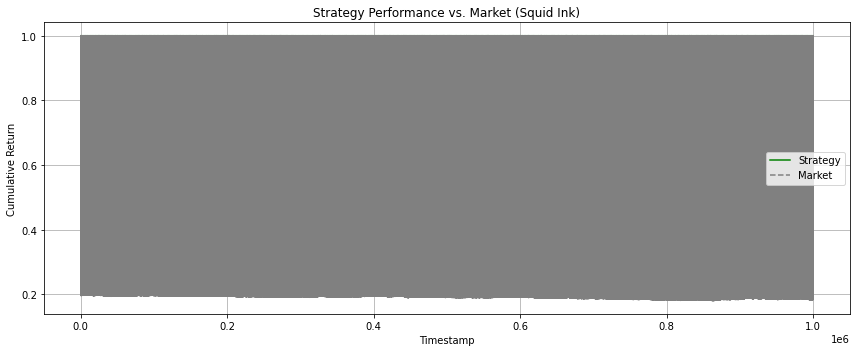

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(squid_prices["timestamp"], squid_prices['cumulative_strategy'], label='Strategy', color='green')
plt.plot(squid_prices["timestamp"], (1 + squid_prices['returns']).cumprod(), label='Market', linestyle='--', color='gray')
plt.title("Strategy Performance vs. Market (Squid Ink)")
plt.xlabel("Timestamp")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# 设置图形大小
plt.figure(figsize=(14, 8))

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

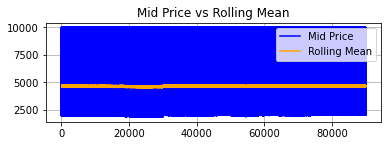

In [24]:
# 图 1：mid_price 与 rolling_mean
plt.subplot(2, 1, 1)
plt.plot(squid_prices['mid_price'], label='Mid Price', color='blue')
plt.plot(squid_prices['rolling_mean'], label='Rolling Mean', color='orange')
plt.title('Mid Price vs Rolling Mean')
plt.legend()
plt.grid(True)

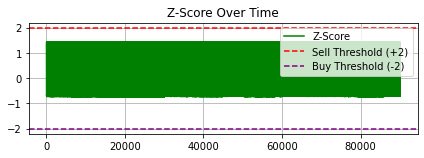

In [25]:
# 图 2：Z-score 和信号阈值
plt.subplot(2, 1, 2)
plt.plot(squid_prices['zscore'], label='Z-Score', color='green')
plt.axhline(2, color='red', linestyle='--', label='Sell Threshold (+2)')
plt.axhline(-2, color='purple', linestyle='--', label='Buy Threshold (-2)')
plt.title('Z-Score Over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

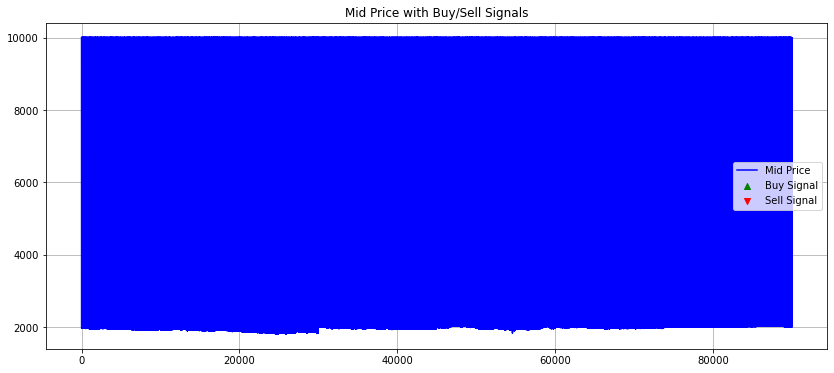

In [26]:
buy_signals = squid_prices[squid_prices['signal'] == 1]
sell_signals = squid_prices[squid_prices['signal'] == -1]

plt.figure(figsize=(14, 6))
plt.plot(squid_prices['mid_price'], label='Mid Price', color='blue')
plt.scatter(buy_signals.index, buy_signals['mid_price'], marker='^', color='green', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['mid_price'], marker='v', color='red', label='Sell Signal')
plt.title('Mid Price with Buy/Sell Signals')
plt.legend()
plt.grid(True)
plt.show()